# Бэггинг и случайный лес

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

In [4]:
df =  load_digits()
X = df.data
y = df.target

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [5]:
model_1 = DecisionTreeClassifier()
score_1 = cross_val_score(model_1, X, y, cv = 10).mean()
score_1

0.8264268177933112

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [6]:
model_2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100)
score_2 = cross_val_score(model_2, X, y, cv = 10).mean()
score_2

0.9249164970125869

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [7]:
model_3 = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = int(len(X[0])**0.5))
score_3 = cross_val_score(model_3, X, y, cv = 10).mean()
score_3

0.9354306413691967

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [8]:
model_4 = BaggingClassifier(DecisionTreeClassifier(max_features = int(len(X[0])**0.5)), n_estimators = 100)
score_4 = cross_val_score(model_4, X, y, cv = 10).mean()
score_4

0.9566416224298206

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [9]:
# пункт 5
rfc = RandomForestClassifier(max_features = 'sqrt')
score_rfc = cross_val_score(rfc, X, y, cv = 10).mean()
score_rfc

0.9215133829898978

In [10]:
n_estimators = [1, 3, 5, 10, 30, 50, 100]
scores = []
for n in n_estimators:
    model = RandomForestClassifier(n_estimators = n)
    scores.append(cross_val_score(model, X, y, cv = 10).mean())

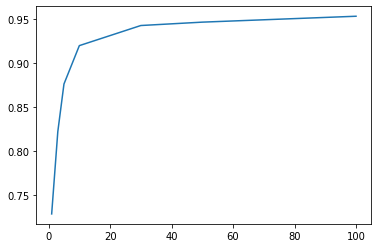

In [11]:
plt.plot(n_estimators, scores)

In [12]:
max_features = [1, 3, 5, 10, 30, 50]
scores = []
for n in max_features:
    model = RandomForestClassifier(max_features = n)
    scores.append(cross_val_score(model, X, y, cv = 10).mean())

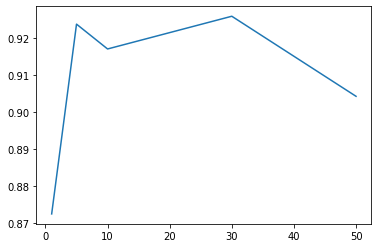

In [13]:
plt.plot(max_features, scores)

In [14]:
max_depth = [1, 3, 5, 10, 30, 50]
scores = []
for n in max_depth:
    model = RandomForestClassifier(max_depth = n)
    scores.append(cross_val_score(model, X, y, cv = 10).mean())

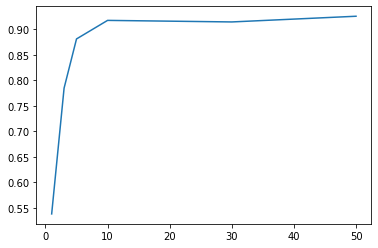

In [15]:
plt.plot(max_depth, scores)

In [16]:
f = open("5.txt", 'w')
f.write('2 3 4 7')
f.close()